<a href="https://colab.research.google.com/github/tarang7895/Image_Classification/blob/main/Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING THE LIBRARIES**

In [ ]:
# NumPy -> To perform the mathematical operation
import numpy as np

# Pandas -> Data Manipulation tool
import pandas as pd

# Matplotlib -> Data Visualisation tool
import matplotlib.pyplot as plt

# Seaborn -> Data Visualisation tool
import seaborn as sns

# ImageDataGenerator -> for Image augmentation, load_img -> to load images
from keras.preprocessing.image import ImageDataGenerator, load_img

# Import train_test_split from sklearn to splitt the data 
from sklearn.model_selection import train_test_split

# Import tensorflow
import tensorflow as tf

# Import to_categorical from keras.utils
from tensorflow.keras.utils import to_categorical

import os

# Import Sequential from keras
from tensorflow.keras.models import Sequential

# conv2D -> 2D Convolutional Layer
# MaxPooling2D -> Pooling Layer
# Dropout -> To prevent Neurall network from overfititng
# Flatten -> Flattening the matrix (from 2D to 1D)
# Dense -> Connected Neural Network
# Activation -> Activation Function
# BatchNormalization -> Feature Scaling
from tensorflow.keras.layers import Conv2D,  MaxPooling2D, Dropout, Flatten, DenseFeatures, Dense,  Activation, BatchNormalization, Rescaling

# **DEFINING THE PROPERTIES**

In [ ]:
# Defining the properties of image 
Image_Width = 130
Image_Height = 130
Image_Size = (Image_Width, Image_Height)
Image_Channels = 3

# **IMPORTING THE DATASET**

In [ ]:
# Storing the path of a dataset in an object
folder_path = "/content/drive/MyDrive/DATA ANALYSIS/Project 2 Dataset/"

In [ ]:
# Create an empty list
file_name_list = []

# Loop to append the path of file to the list using 
for root, dirs, files in os.walk(folder_path):
	for file in files:
		 #append the file name to the list
		file_name_list.append(os.path.join(root,file))

In [ ]:
# Returns the list with path of each file as an element
file_name_list

['/content/drive/MyDrive/DATA ANALYSIS/Project 2 Dataset/Daisy/10437754174_22ec990b77_m.jpg',
 '/content/drive/MyDrive/DATA ANALYSIS/Project 2 Dataset/Daisy/10300722094_28fa978807_n.jpg',
 '/content/drive/MyDrive/DATA ANALYSIS/Project 2 Dataset/Daisy/10437770546_8bb6f7bdd3_m.jpg',
 '/content/drive/MyDrive/DATA ANALYSIS/Project 2 Dataset/Daisy/102841525_bd6628ae3c.jpg',
 '/content/drive/MyDrive/DATA ANALYSIS/Project 2 Dataset/Daisy/10172567486_2748826a8b.jpg',
 '/content/drive/MyDrive/DATA ANALYSIS/Project 2 Dataset/Daisy/10466290366_cc72e33532.jpg',
 '/content/drive/MyDrive/DATA ANALYSIS/Project 2 Dataset/Daisy/10391248763_1d16681106_n.jpg',
 '/content/drive/MyDrive/DATA ANALYSIS/Project 2 Dataset/Daisy/10466558316_a7198b87e2.jpg',
 '/content/drive/MyDrive/DATA ANALYSIS/Project 2 Dataset/Daisy/10172379554_b296050f82_n.jpg',
 '/content/drive/MyDrive/DATA ANALYSIS/Project 2 Dataset/Daisy/10555749515_13a12a026e.jpg',
 '/content/drive/MyDrive/DATA ANALYSIS/Project 2 Dataset/Daisy/105558265

AxesImage(54,36;334.8x217.44)


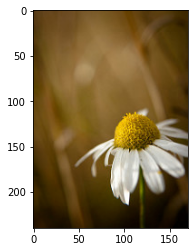

AxesImage(54,36;334.8x217.44)


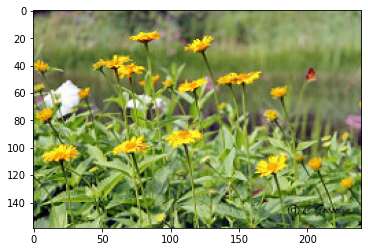

AxesImage(54,36;334.8x217.44)


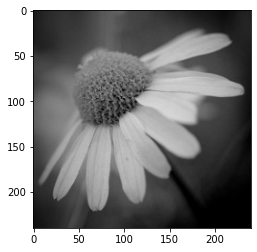

AxesImage(54,36;334.8x217.44)


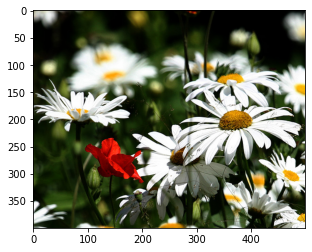

AxesImage(54,36;334.8x217.44)


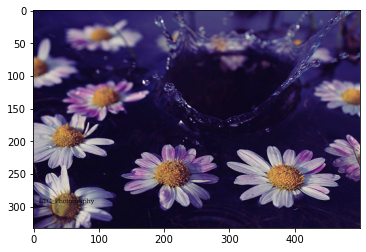

AxesImage(54,36;334.8x217.44)


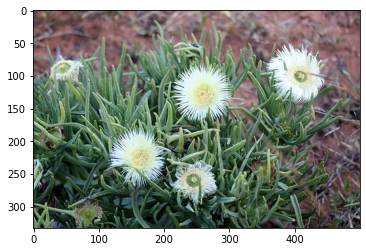

AxesImage(54,36;334.8x217.44)


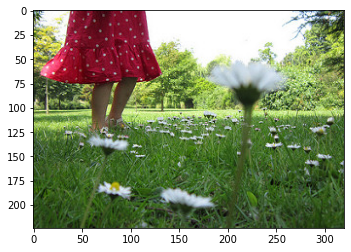

AxesImage(54,36;334.8x217.44)


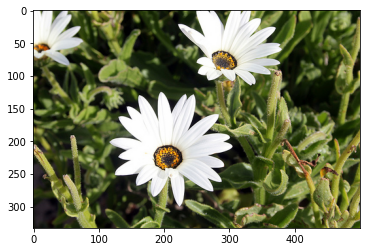

AxesImage(54,36;334.8x217.44)


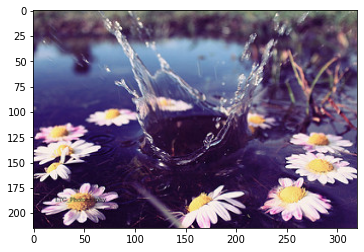

AxesImage(54,36;334.8x217.44)


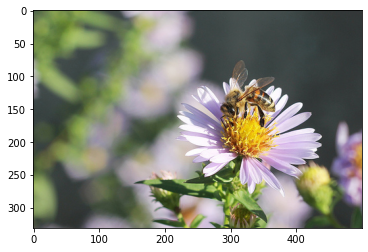

In [ ]:
# Viewing the first 10 images in file_name_list.
for i in range(10):
  a = plt.imread(file_name_list[i]) # Read the image
  print(plt.imshow(a))
  plt.show() # Show the image

In [ ]:
# Create an empty list 
categories = []
# Here, categories will act as a Target variable

# Append the list to create categories of flowers
for i in file_name_list:
  if 'Daisy' in i:
    categories.append(0)
  elif 'Dandelion' in i:
    categories.append(1)
  elif 'Rose' in i:
    categories.append(2)
  elif 'Sunflower' in i:
    categories.append(3)
  else:
    categories.append(4)


In [ ]:
# Determine the total number of images
len(categories)

4327

In [ ]:
# Determine number of images in each category
print('Daisy: ', categories.count(0))
print('Dandelion: ', categories.count(1))
print('Rose: ', categories.count(2))
print('Sunflower: ', categories.count(3))
print('Tulip: ', categories.count(4))

Daisy:  764
Dandelion:  1062
Rose:  784
Sunflower:  733
Tulip:  984


In [ ]:
# Create a DataFrame with file path as Feature and categories as target variable
df = pd.DataFrame({'Feature': file_name_list, 'Category': categories})

In [ ]:
# Returns the DataFrame
df

,Feature,Category
0,/content/drive/MyDrive/DATA ANALYSIS/Project 2...,0
1,/content/drive/MyDrive/DATA ANALYSIS/Project 2...,0
2,/content/drive/MyDrive/DATA ANALYSIS/Project 2...,0
3,/content/drive/MyDrive/DATA ANALYSIS/Project 2...,0
4,/content/drive/MyDrive/DATA ANALYSIS/Project 2...,0
...,...,...
4322,/content/drive/MyDrive/DATA ANALYSIS/Project 2...,4
4323,/content/drive/MyDrive/DATA ANALYSIS/Project 2...,4
4324,/content/drive/MyDrive/DATA ANALYSIS/Project 2...,4
4325,/content/drive/MyDrive/DATA ANALYSIS/Project 2...,4


In [ ]:
# change the data type of target column to string
df['Category']=df['Category'].astype('str')

# **CREATE GENERATORS**

In [ ]:
datagen = ImageDataGenerator(rescale=1/255.0,validation_split=0.25)

# Initializing training generator
train_generator = datagen.flow_from_dataframe(dataframe=df,
                                              x_col='Feature',
                                              y_col="Category",
                                              class_mode = 'categorical',
                                              target_size = Image_Size,
                                              subset = 'training' )

# Initializing validation generator
validation_generator = datagen.flow_from_dataframe(dataframe=df,
                                                   x_col='Feature',
                                                   y_col="Category",
                                                   class_mode = 'categorical' ,
                                                   target_size = Image_Size,
                                                   subset = 'validation')

Found 3246 validated image filenames belonging to 5 classes.
Found 1081 validated image filenames belonging to 5 classes.


In [ ]:
for image_batch in train_generator:
  break  
image_batch.shape

AttributeError: ignored

# **CNN MODEL**

In [ ]:
#  Define the model
model = Sequential([Rescaling(1./255, input_shape = (Image_Width, Image_Height, Image_Channels))])

* **Feature Extraction Layer**

In [ ]:
# Add the Layer using model.add
model.add(Conv2D(32, (2,2), activation = 'relu', input_shape = (Image_Width, Image_Height, Image_Channels)))
# Feature scaling for input features 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.20))


model.add(Conv2D(64, (2,2), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.20))


model.add(Conv2D(128, (2,2), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.20))

* **Flatten the Matrix**

In [ ]:
model.add(Flatten())

* **Hidden Layers**

In [ ]:
# 1st Hidden Layer
model.add(Dense (128, activation = 'sigmoid'))
model.add(BatchNormalization())

# 2nd Hidden Layer
model.add(Dense (1, activation = 'softmax'))
model.add(BatchNormalization())

# Compile the model
model.compile(loss = 'categorical_crossentropy', optimizer= 'rmsprop', metrics = ['accuracy'])

# **TRAINING PHASE**

In [ ]:

train_size = train_generator.n//train_generator.batch_size
valid_size = validation_generator.n//validation_generator.batch_size

In [ ]:
# Fit the model using fit_generator
model.fit_generator(generator=train_generator,                   
                    epochs=10,
                    validation_data=validation_generator,
                    steps_per_epoch=train_size,
                    validation_steps= valid_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
101/101 [==============================] - 731s 7s/step - loss: nan - accuracy: 0.8000 - val_loss: nan - val_accuracy: 0.8000
Epoch 2/10
101/101 [==============================] - 129s 1s/step - loss: nan - accuracy: 0.8000 - val_loss: nan - val_accuracy: 0.8000
Epoch 3/10
101/101 [==============================] - 123s 1s/step - loss: nan - accuracy: 0.8000 - val_loss: nan - val_accuracy: 0.8000
Epoch 4/10
101/101 [==============================] - 122s 1s/step - loss: nan - accuracy: 0.8000 - val_loss: nan - val_accuracy: 0.8000
Epoch 5/10
101/101 [==============================] - 123s 1s/step - loss: nan - accuracy: 0.8000 - val_loss: nan - val_accuracy: 0.8000
Epoch 6/10
101/101 [==============================] - 124s 1s/step - loss: nan - accuracy: 0.8000 - val_loss: nan - val_accuracy: 0.8000
Epoch 7/10
101/101 [==============================] - 123s 1s/step - loss: nan - accuracy: 0.8000 - val_loss: nan - val_accuracy: 0.8000
Epoch 8/10
101/101 [=====================

# **EVALUATE THE MODEL**

In [ ]:
# Calculate the accuracy score of the model
score = model.evaluate_generator(validation_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


Test loss: nan
Test accuracy: 0.7999997735023499


# **PICKLE THE MODEL**

In [ ]:
# Pickling the model
import pickle
file_name = 'flower_classification'
pickle.dump(model, open(file_name, 'wb'))

INFO:tensorflow:Assets written to: ram://f9185c3b-796d-4445-a86d-2f2bb2d6b1ef/assets


In [ ]:
# load the pickled object
loaded_model = pickle.load(open(file_name, 'rb'))